In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras as tfk

In [2]:
# Get limit order book data 
orderbook = pd.read_csv('/Users/tanvipotdar/Projects/LOBster/data_tqap/INTC_2015-01-01_2015-01-31_10/INTC_2015-01-02_34200000_57600000_orderbook_10.csv')

In [3]:
# Normalise the data
from scipy.stats import zscore
normalised_data = orderbook.apply(zscore)
normalised_data.head(10)

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
0,0.796834,-0.070811,0.114857,-1.063739,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.816904,-0.872724,2.450812,-0.888307,-0.885917,-1.164202,2.58852,-0.313841,-1.092996,-1.491542
1,0.796834,-0.070811,0.114857,-1.063739,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.816904,-0.872724,2.450812,-0.888307,-0.885917,-1.164202,2.58852,-0.313841,-1.092996,-1.491542
2,0.796834,-0.070811,0.114857,-1.154853,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.816904,-0.872724,2.450812,-0.888307,-0.885917,-1.164202,2.58852,-0.313841,-1.092996,-1.491542
3,0.796834,-0.070811,0.114857,-1.154853,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.437242,-0.872724,2.450812,-0.888307,-0.782372,-1.164202,2.58852,-0.313841,-0.851389,-1.491542
4,0.796834,-0.070811,0.114857,-1.154853,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.437242,-0.872724,2.450812,-0.888307,-0.782372,-1.164202,2.58852,-0.313841,-0.851389,-1.491542
5,0.796834,-0.070811,0.114857,-1.154853,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.437242,-0.872724,2.450812,-0.888307,-0.782372,-1.164202,2.58852,-0.313841,-0.851389,-1.491542
6,0.796834,-0.070811,0.114857,-1.154853,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.437242,-0.872724,2.450812,-0.888307,-0.782372,-1.164202,2.58852,-0.313841,-0.851389,-1.491542
7,0.796834,-0.070811,0.114857,-1.154853,0.831288,-1.895349,0.011343,-1.984987,0.934676,-1.788479,...,-0.437242,-0.872724,2.450812,-0.888307,-0.782372,-1.164202,2.58852,-0.313841,-0.851389,-1.491542
8,0.796834,-0.070811,0.632554,-1.154853,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-0.402727,-0.894391,2.450812,-0.888307,-0.402710,-1.164202,2.58852,-0.313841,-0.747843,-1.491542
9,0.796834,-0.070811,0.632554,-1.124482,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-0.402727,-0.894391,2.450812,-0.888307,-0.402710,-1.164202,2.58852,-0.313841,-0.747843,-1.491542


In [4]:
# calculate the midprice
normalised_data['midprice'] = (normalised_data.ask_price_1+normalised_data.bid_price_1)/2

In [5]:
# smoothed labelling of the midprice/ k is the prediction horizon
k = 10
# mean of previous k mid-prices
normalised_data['m_minus'] = normalised_data['midprice'].rolling(window=k).mean()
# mean of next k mid-prices
normalised_data['m_plus'] = normalised_data['midprice'][::-1].rolling(window=k).mean()[::-1]

In [6]:
# label the smoothed mid-prices based on a threshold/ alpha is the threshold 
alpha = 0.0001
normalised_data['change'] = (normalised_data.m_plus - normalised_data.m_minus)/normalised_data.m_minus
# assign categories up, down, stationary
normalised_data['label'] = pd.cut(normalised_data.change, bins=[-np.inf, -alpha, alpha, np.inf], 
                                  labels=['down', 'stationary', 'up'])
# drop all unlabelled values (will be first and last k values as they have no m_minus/m_plus value)
normalised_data.dropna(inplace=True)
normalised_data.head()

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10,midprice,m_minus,m_plus,change,label
9,0.796834,-0.070811,0.632554,-1.124482,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-1.164202,2.58852,-0.313841,-0.747843,-1.491542,0.714694,0.507615,0.714694,0.407945,up
10,0.796834,-0.070811,0.632554,-1.124482,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-1.164202,2.58852,-0.313841,-0.747843,-1.491542,0.714694,0.533500,0.714694,0.339633,up
11,0.796834,-0.070811,0.632554,-1.124482,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-1.164202,2.58852,-0.313841,-0.747843,-1.491542,0.714694,0.559385,0.714694,0.277643,up
12,0.796834,-0.070811,0.632554,-1.094110,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-1.164202,2.58852,-0.313841,-0.747843,-1.491542,0.714694,0.585270,0.714694,0.221136,up
13,0.796834,-0.070811,0.632554,-1.094110,0.831288,-1.895349,0.149397,-2.053207,0.934676,-1.788479,...,-1.197339,2.58852,-0.313841,-0.368176,-1.491542,0.714694,0.611155,0.714694,0.169416,up


In [64]:
# get input and output train and test data
data = normalised_data[:887600]

cols = data.columns.to_list()[:40]
input_data = data[cols]
input_array = input_data.to_numpy().reshape(8876,100,40,1)

from sklearn.preprocessing import OneHotEncoder
output_data = data.label.to_numpy()[::-100][::-1]
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = output_data.reshape(len(output_data), 1)
output_array = onehot_encoder.fit_transform(integer_encoded)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_array, output_array, shuffle=False)

In [65]:
print(integer_encoded)
print(output_array)

[['up']
 ['down']
 ['down']
 ...
 ['stationary']
 ['stationary']
 ['stationary']]
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [8]:
# convolutional layers
model = tfk.Sequential()
model.add(tfk.layers.Conv2D(filters=16, kernel_size=(1,2), input_shape=(100,40,1), strides=(1, 2)))
model.add(tfk.layers.LeakyReLU(alpha=0.01))
model.add(tfk.layers.Conv2D(filters=16, kernel_size=(1,2), strides=(1, 2)))
model.add(tfk.layers.LeakyReLU(alpha=0.01))
model.add(tfk.layers.Conv2D(filters=16, kernel_size=(1,10), input_shape=(100,10,1)))
model.add(tfk.layers.TimeDistributed(tfk.layers.Flatten()))

# lstm layer
model.add(tfk.layers.LSTM(64))
model.add(tfk.layers.Dense(3,activation='softmax'))

# compile model and summarize
adam = tfk.optimizers.Adam(lr=0.01, epsilon=1)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 20, 16)       48        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100, 20, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 10, 16)       528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 10, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 1, 16)        2576      
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 16)           0         
_________________________________________________________________
lstm

In [19]:
BATCH_SIZE = 32
EPOCHS = 40
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)


Train on 5325 samples, validate on 1332 samples
Epoch 1/40
5325/5325 [==============================] - 12s 2ms/sample - loss: 0.4430 - acc: 0.8597 - val_loss: 0.3421 - val_acc: 0.9032
Epoch 2/40
5325/5325 [==============================] - 12s 2ms/sample - loss: 0.4425 - acc: 0.8601 - val_loss: 0.3450 - val_acc: 0.9032
Epoch 3/40
5325/5325 [==============================] - 13s 2ms/sample - loss: 0.4398 - acc: 0.8605 - val_loss: 0.3374 - val_acc: 0.9032
Epoch 4/40
5325/5325 [==============================] - 13s 2ms/sample - loss: 0.4368 - acc: 0.8584 - val_loss: 0.3407 - val_acc: 0.9032
Epoch 5/40
5325/5325 [==============================] - 12s 2ms/sample - loss: 0.4361 - acc: 0.8607 - val_loss: 0.3352 - val_acc: 0.9032
Epoch 6/40
5325/5325 [==============================] - 12s 2ms/sample - loss: 0.4318 - acc: 0.8597 - val_loss: 0.3430 - val_acc: 0.9032
Epoch 7/40
5325/5325 [==============================] - 12s 2ms/sample - loss: 0.4317 - acc: 0.8588 - val_loss: 0.3450 - val_acc: 

In [20]:
_, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print(accuracy*100)

2219/2219 [==============================] - 2s 738us/sample - loss: 0.4583 - acc: 0.8463
84.63271856307983


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['down', 'stationary', 'up']
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_pred_bool, y_test_bool))
cm = confusion_matrix(y_test_bool, y_pred_bool, labels=[0,1,2])
print(cm)
# onehot_encoder.inverse_transform(model.predict(X_test))

              precision    recall  f1-score   support

           0       0.15      0.09      0.11       171
           1       0.93      0.91      0.92      2043
           2       0.01      0.20      0.02         5

   micro avg       0.85      0.85      0.85      2219
   macro avg       0.36      0.40      0.35      2219
weighted avg       0.87      0.85      0.86      2219

[[  16   92    0]
 [ 134 1861    4]
 [  21   90    1]]


Text(0, 0.5, 'Cost')

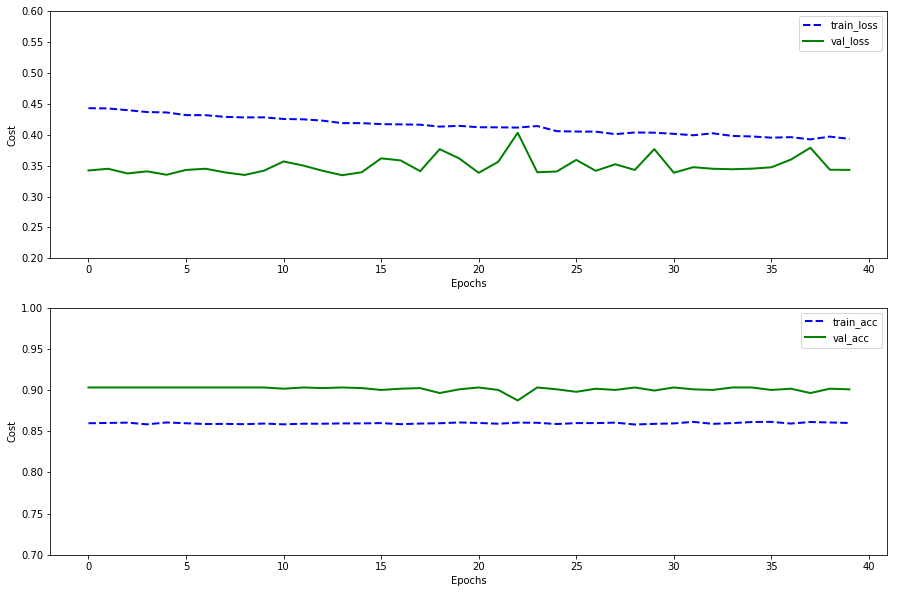

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'],'b--',lw=2,label='train_loss')
plt.plot(history.history['val_loss'],'g-',lw=2,label='val_loss')
plt.legend()
plt.ylim([.2,0.6])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.subplot(2,1,2)
plt.plot(history.history['acc'],'b--',lw=2,label='train_acc')
plt.plot(history.history['val_acc'],'g-',lw=2,label='val_acc')
plt.legend()
plt.ylim([.7,1.0])
plt.xlabel('Epochs')
plt.ylabel('Cost')